In [1]:
import sys

sys.path.append('../sbe_vallib')

In [2]:
from validation import validate

## Создаем данные

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

dataset = make_classification(n_samples=int(1e4),
                              n_features=50,
                              n_informative=5,
                              n_redundant=0, #linear combinations of the informative features
                              n_repeated=0,
                              shuffle=False,
                              random_state=1520)
feature_names = [f'feat_{i}' for i in range(50)]
x_train, x_oos, y_train, y_oos = train_test_split(*dataset, test_size=0.4)
model = RandomForestClassifier(n_estimators=20, n_jobs=2, max_depth=2, max_features=40).fit(x_train, y_train)

In [4]:
!rm -rf ./tests_results

Calculating logs:
	Preprocessor is not defined, data will not be preprocessed.
	Fitting preprocessor...
	Fitting model...
	Making train/test predictions...
	Making pickles...
	Calculating statistics for confidence intervals on 50 iterations:


100%|██████████| 50/50 [00:46<00:00,  1.08it/s]


	Calculating feature importance on 3 split and 3 shuffle iterations:
	Iteration: split 0 / shuffle 0


100%|██████████| 50/50 [00:24<00:00,  2.02it/s]


	Iteration: split 0 / shuffle 1


100%|██████████| 50/50 [00:25<00:00,  1.92it/s]


	Iteration: split 0 / shuffle 2


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]


	Iteration: split 1 / shuffle 0


100%|██████████| 50/50 [00:24<00:00,  2.05it/s]


	Iteration: split 1 / shuffle 1


100%|██████████| 50/50 [00:25<00:00,  1.98it/s]


	Iteration: split 1 / shuffle 2


100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


	Iteration: split 2 / shuffle 0


100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


	Iteration: split 2 / shuffle 1


100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


	Iteration: split 2 / shuffle 2


100%|██████████| 50/50 [00:26<00:00,  1.87it/s]


	Calculating train/test independence stats on 200 iterations:


100%|██████████| 200/200 [54:39<00:00, 16.40s/it]


Logs are successfully calculated.
--------------------------------------------------------------------------------
Executing test_1_2
Executing test_2_1
Executing test_2_2


100%|██████████| 3/3 [00:05<00:00,  1.86s/it]


Executing test_2_3
Executing test_2_4
Executing test_2_5


findfont: Font family ['Consolas'] not found. Falling back to DejaVu Sans.


Executing test_3_1
Executing test_3_2
Executing test_4_1
Executing test_4_2


100%|██████████| 4/4 [00:00<00:00, 370.82it/s]

Executing test_5_1


Executing test_5_2
Executing test_5_3
Executing test_5_4
Executing test_5_5
Executing test_5_6
Executing test_5_7
Done.


,Task,Duration (s),Total time (s),Status
0,Start,0.000000,0.000000,OK
1,Fitting preprocessor,0.021081,0.021081,OK
2,Fitting model,2.990422,3.011503,OK
3,Making train/test predictions,0.285773,3.297276,OK
4,Making pickles,0.229207,3.526482,OK
5,Confidence intervals calculation,49.983817,53.510299,OK
6,Feature importance calculation,242.998561,296.508861,OK
7,Train/test independence calculation,3287.018209,3583.527070,OK
8,test_1_2,1.143347,3584.670416,OK
9,test_2_1,0.244101,3584.914517,OK


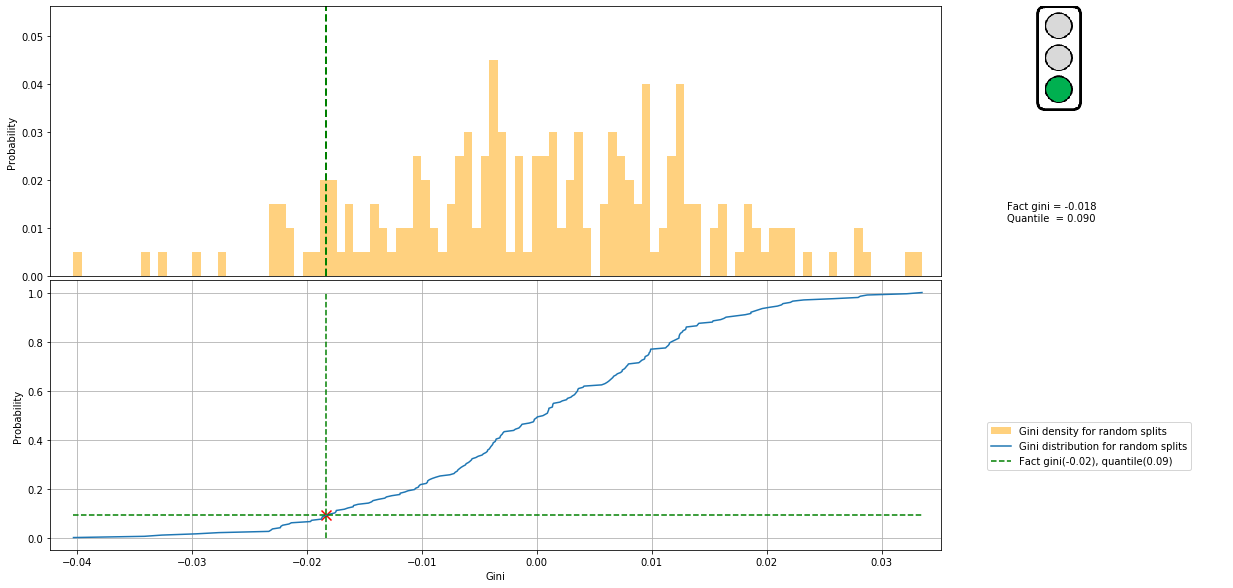

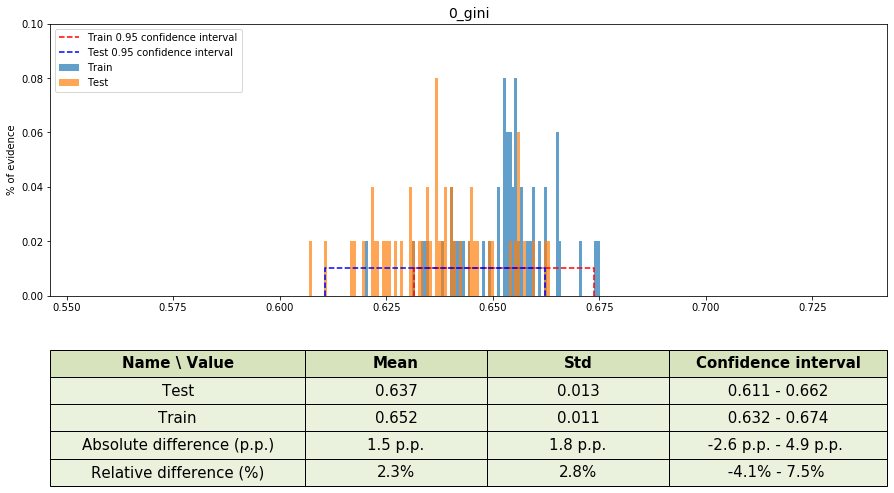

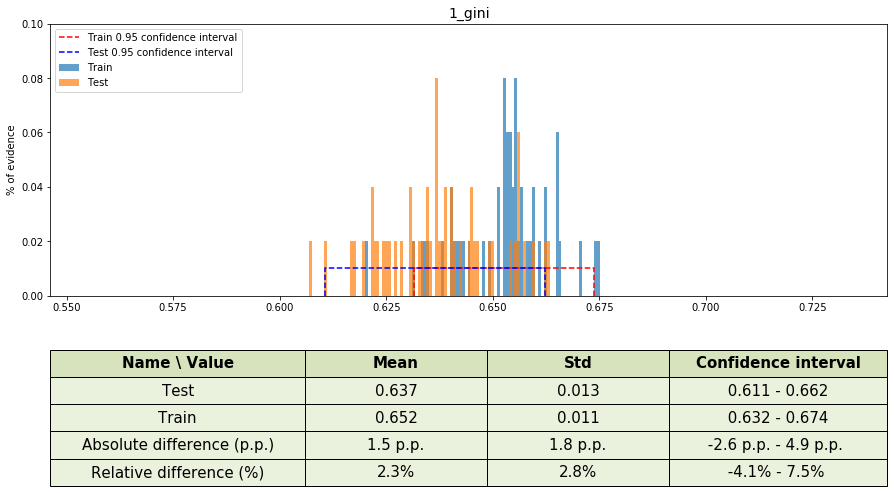

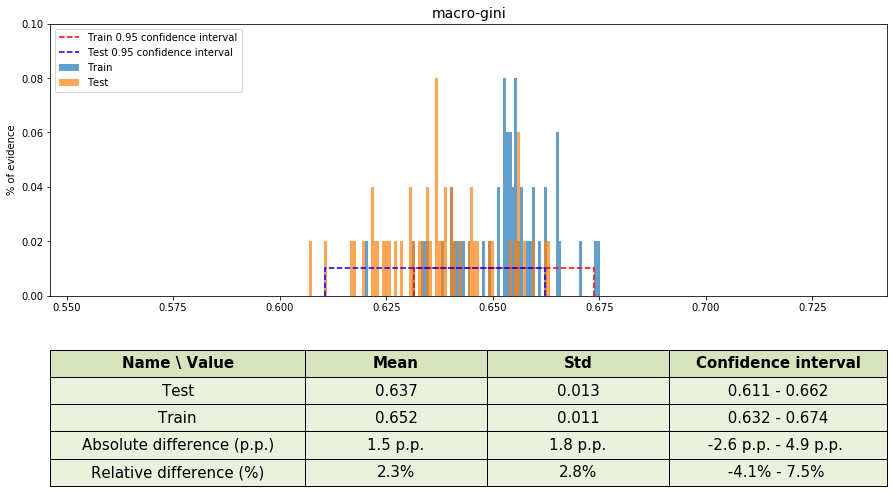

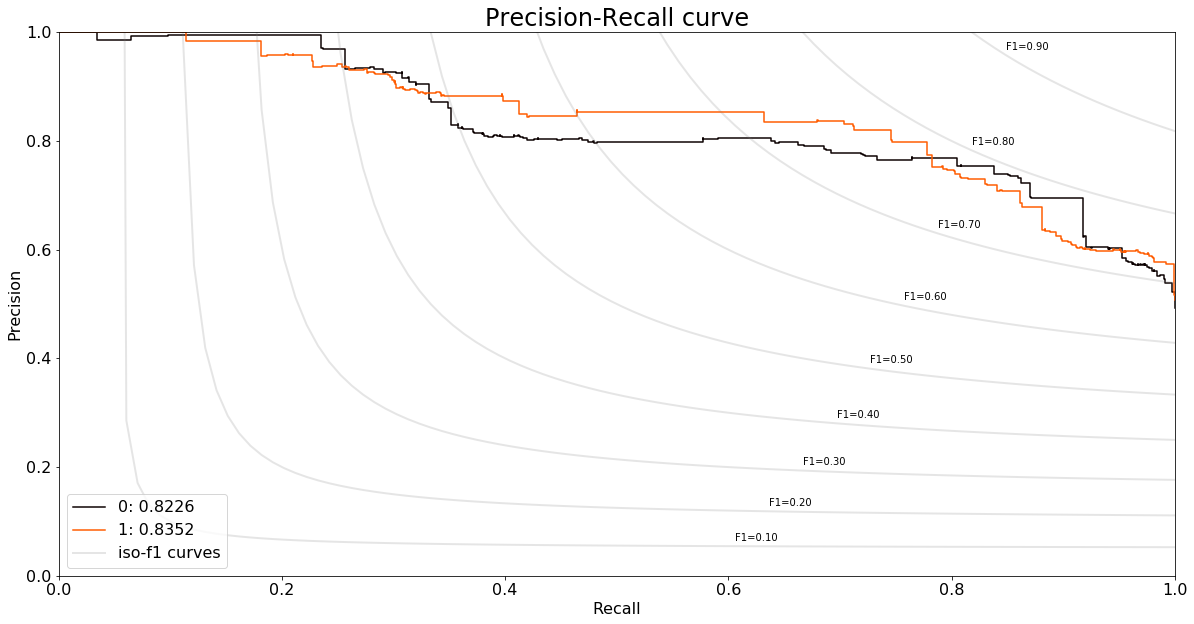

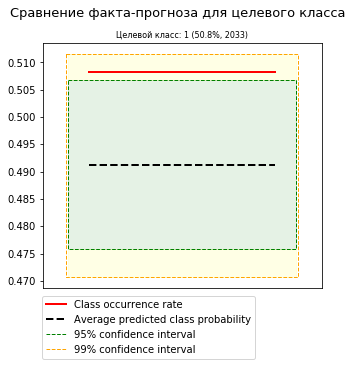

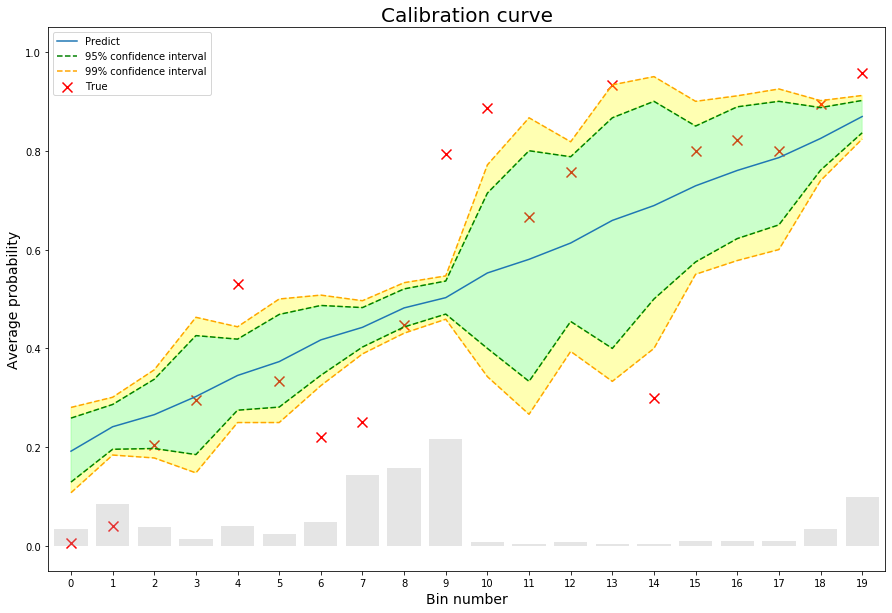

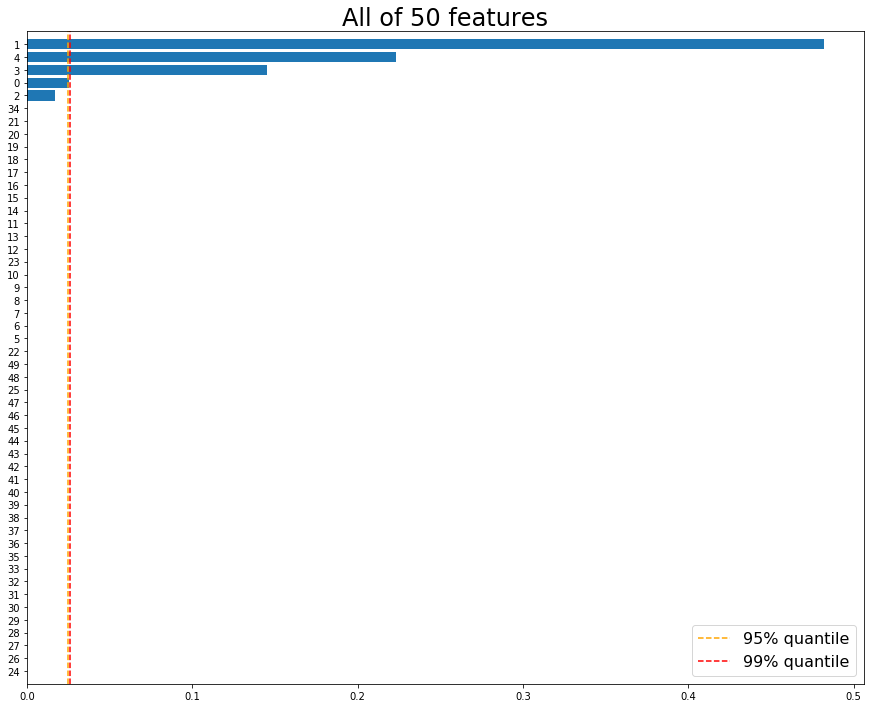

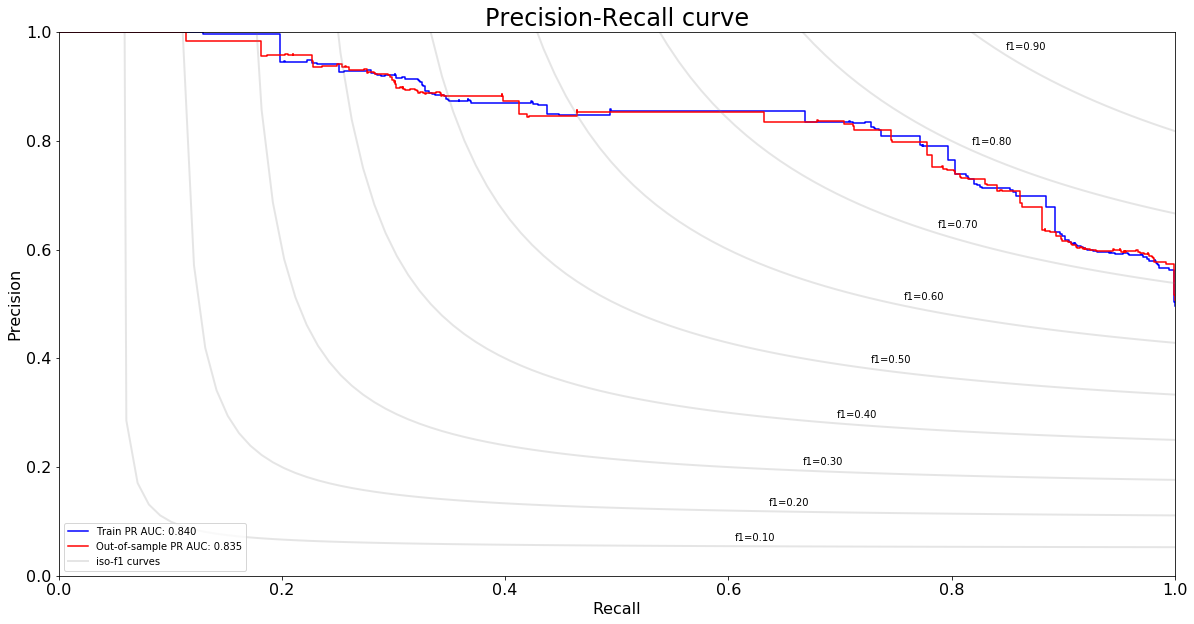

In [5]:
validate(x_train, y_train, model=model,
         model_type='binary',
         X_oos=x_oos,
         y_oos=y_oos,
         path='./tests_results',
         n_iter_conf=50,
         bootstrap_conf_int=True, exclude_list=['test_1_1', 'test_1_3_info', 'test_1_8'] )

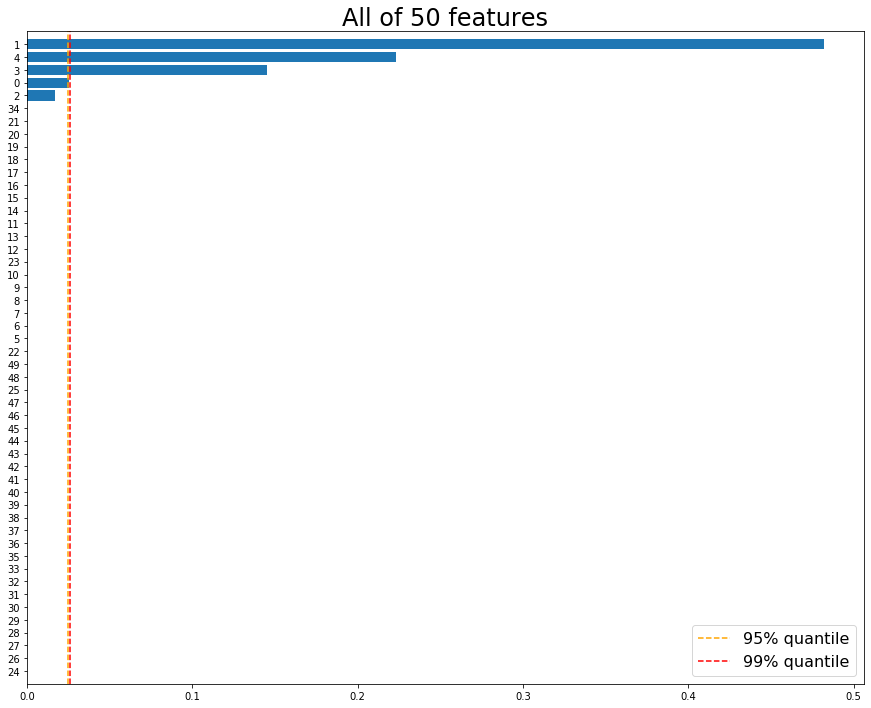

In [6]:
from PIL import Image

Image.open('./tests_results/test_4_1_Feature_importance_best.png')

In [7]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

result = permutation_importance(model, x_oos, y_oos, n_repeats=10, random_state=42, n_jobs=2)
importances = pd.Series(result.importances_mean, index=feature_names)
importances.sort_values(inplace=True, ascending=False)

In [8]:
importances.iloc[np.r_[0:5, -5:0]]

feat_1     0.167975
feat_4     0.114675
feat_3     0.105075
feat_2     0.007325
feat_0     0.003150
feat_29    0.000000
feat_28    0.000000
feat_27    0.000000
feat_26    0.000000
feat_24    0.000000
dtype: float64

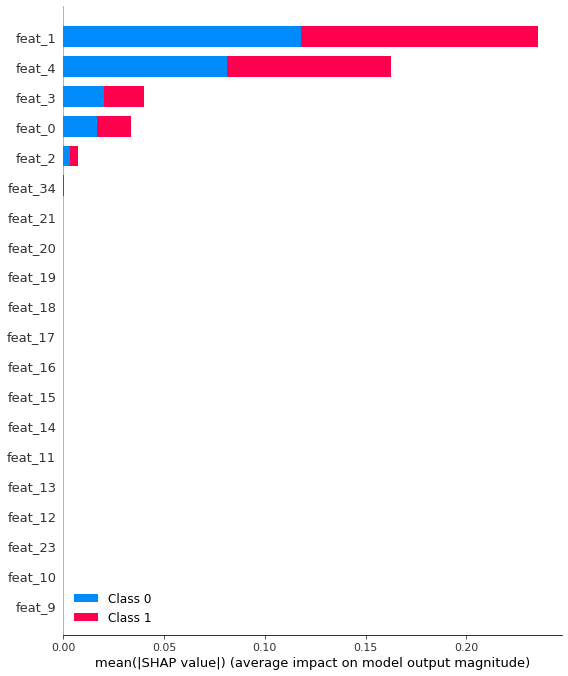

In [9]:
import shap

explainer = shap.TreeExplainer(model)  
shap_values = explainer.shap_values(x_oos)
shap.summary_plot(shap_values, features=x_oos, feature_names=feature_names, plot_type='bar')

In [10]:
#tree based

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
importances = pd.Series(importances, index=feature_names)
importances.sort_values(inplace=True, ascending=False)

In [11]:
importances.iloc[np.r_[0:5, -5:0]]

feat_1     0.504464
feat_4     0.282746
feat_3     0.143034
feat_0     0.057019
feat_2     0.012036
feat_29    0.000000
feat_28    0.000000
feat_27    0.000000
feat_26    0.000000
feat_24    0.000000
dtype: float64